In [1]:
# import dependencies
from pybaseball import statcast
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
#Read csv that was pre-pulled using pybaseball, list out available data
data_17 = pd.read_csv('2017_data.csv')
list(data_17)

['Unnamed: 0',
 'index',
 'pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'pos2_person_id',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pos1_person_id',
 'pos2_person_id.1',
 'pos3_person_id',
 'pos4_person_id',
 'pos5_person_id',
 'pos6_person_id',
 'pos7_person_id',
 'pos8_person_id',
 'pos

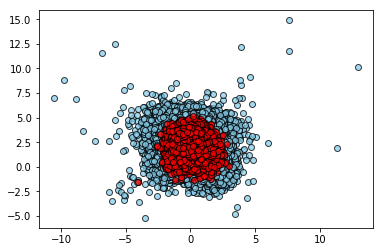

In [4]:
#Plot where in zone strikeouts happen vs all events
k_df = data_17.loc[data_17['events'].isin(['strikeout'])]
x_plot_k = k_df['plate_x']
y_plot_k = k_df['plate_z']
x_plot_all = data_17['plate_x']
y_plot_all = data_17['plate_z']
plt.scatter(x=x_plot_all,y=y_plot_all,c='skyblue',edgecolors='black',alpha=0.75)
plt.scatter(x=x_plot_k,y=y_plot_k,c='red',edgecolors='black',alpha=0.75)
plt.show()

In [5]:
# set strike zone between px -1.5 and 1.5
strike_lateral = [-1.5 , 1.5]
strike_top = data_17['sz_top']
strike_bottom = data_17['sz_bot']
#plt.scatter(x=strike_lateral,y=strike_top,c='skyblue',edgecolors='black',alpha=0.75)
#plt.scatter(x=x_plot_all,y=y_plot_all,c='skyblue',edgecolors='black',alpha=0.75)
#plt.show

In [3]:
#Read player_id csv downloaded from web. This is used to match player ids in our pybaseball dataset
player_id = pd.read_csv('player_id.csv')
player_id.head()

,mlb_id,mlb_name,mlb_pos,mlb_team,mlb_team_long,bats,throws,birth_year,bp_id,bref_id
0,592091,A.J. Achter,P,LAA,Los Angeles Angels,R,R,1988,66919,achteaj01
1,595918,A.J. Cole,P,NYY,New York Yankees,R,R,1992,68086,coleaj01
2,454560,A.J. Ellis,C,SD,San Diego Padres,R,R,1981,47564,ellisaj01
3,456167,A.J. Griffin,P,TEX,Texas Rangers,R,R,1988,65757,griffaj01
4,543362,A.J. Jimenez,C,TEX,Texas Rangers,R,R,1990,58320,jimenaj01


In [7]:
#Merge player ID and 2017 data, drop na's for variables we will use, create variables for later use
#look at list of events to see which ones we should exclude
pitch_df = pd.merge(data_17,player_id,left_on='batter', right_on='mlb_id')
pitch_df = pitch_df.dropna(subset=['release_speed','release_spin_rate'])
events_df = pitch_df.groupby(['events','pitch_name']).mean()
pitch_df['events'].unique()

array(['field_out', nan, 'single', 'strikeout', 'home_run', 'walk',
       'grounded_into_double_play', 'sac_bunt', 'sac_fly', 'force_out',
       'hit_by_pitch', 'field_error', 'double', 'fielders_choice_out',
       'double_play', 'strikeout_double_play', 'pickoff_2b',
       'fielders_choice', 'caught_stealing_2b', 'triple',
       'catcher_interf', 'pickoff_caught_stealing_2b',
       'caught_stealing_3b', 'other_out', 'triple_play', 'run',
       'pickoff_1b', 'sac_fly_double_play', 'caught_stealing_home',
       'pickoff_caught_stealing_3b', 'pickoff_caught_stealing_home',
       'batter_interference'], dtype=object)

In [8]:
# Looking at spin rate vs. velocity for strikeouts of sliders
k_df = pitch_df.loc[pitch_df['events'].isin(['strikeout'])]
sl_k_df = k_df.loc[k_df['pitch_type'] == 'SL']
sl_k_velo = sl_k_df['release_speed']
sl_k_spin = sl_k_df['release_spin_rate']

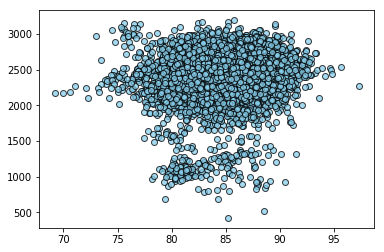

In [9]:
#plotting slider strikeouts
plt.scatter(x=sl_k_velo,y=sl_k_spin,c='skyblue',edgecolors='black',alpha=0.75)
plt.show()

In [10]:
# Define plot events for any event that was a hit 
plot_events = pitch_df.loc[pitch_df['events'].isin(['single','double','triple','home_run'])]

In [11]:
# Filter the events that were hits for when the pitch was a slider
sl_events = plot_events.loc[plot_events['pitch_type'] == 'SL']
sl_velo = sl_events['release_speed']
sl_spin = sl_events['release_spin_rate']

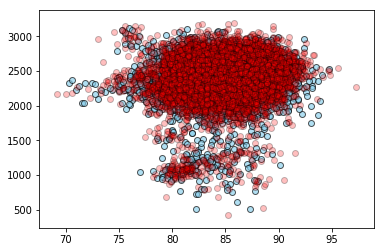

In [12]:
#Plotting spin rate vs. velocity for both strikeouts and hits
plt.scatter(x=sl_velo,y=sl_spin,c='skyblue',edgecolors='black',alpha=0.65)
plt.scatter(x=sl_k_velo,y=sl_k_spin,c='red',edgecolors='black',alpha=0.25)
plt.show()

In [13]:
# Create a data frame for pitcher's averages on variables we will pass through our neural net
# We will use this later to run predictions
# Automatic Ball (AB) = 0, Changeup (CH) = 1, Curveball (CU) = 2, Eephus (EP) = 3, Cutter (FC) = 4
# 4 Seam FB (FF) = 5, Forkball (FO) = 6, Split (FS) = 7, 2 Seam FB (FT) = 8, Knuckle Curve (KC) = 9
# Knuckle Ball (KN) = 10, Pitch Out (PO) = 11, Screwball (SC) = 12, Sinker (SI) = 13, Slider (SL) = 14
#Unkown (UN) = 15
pitcher_av = pitch_df.filter(['index','player_name','pitch_type','release_speed','release_spin_rate','events','plate_x','plate_z','game_date'],axis=1)
pitcher_av = pitcher_av.replace({'AB':0,'CH':1,'CU':2,'EP':3,'FC':4,'FF':5,'FO':6,'FS':7,'FT':8,'KC':9,'KN':10,'PO':11,'SC':12,'SI':13,'SL':14,'UN':15})
pitcher_av = pitcher_av.groupby(['player_name','pitch_type']).mean()
pitcher_av.head()

index  release_speed  release_spin_rate  \
player_name pitch_type                                                   
A.J. Cole   1.0         13294.180328      86.108197        1671.721311   
            2.0         11176.130841      79.643925        2211.504673   
            5.0         13315.749487      93.137372        2108.344969   
            8.0         10571.615385      92.626923        2076.500000   
            14.0        12721.669903      85.075728        2155.970874   

                         plate_x   plate_z  
player_name pitch_type                      
A.J. Cole   1.0        -0.632875  1.669928  
            2.0        -0.110070  1.934343  
            5.0        -0.003721  2.494390  
            8.0        -0.369558  2.526358  
            14.0        0.475043  1.787035

In [14]:
# Batter averages - not used for this model but could be used for later models
batter_av = pitch_df.groupby(['mlb_name','pitch_name']).mean()
batter_av.head()

Unnamed: 0         index  release_speed  \
mlb_name  pitch_name                                                    
A.J. Cole 2-Seam Fastball  108893.500000  13499.000000      91.800000   
          4-Seam Fastball  219319.868421   9802.289474      92.165789   
          Changeup         105158.333333  12140.333333      83.033333   
          Curveball         79552.000000  16090.000000      77.900000   
          Cutter           225664.250000  23563.250000      87.850000   

                           release_pos_x  release_pos_z        pitcher  \
mlb_name  pitch_name                                                     
A.J. Cole 2-Seam Fastball      -1.792083       5.565383  607058.500000   
          4-Seam Fastball      -0.732571       6.082095  552492.789474   
          Changeup              2.763933       6.288900  543045.000000   
          Curveball            -1.709733       5.448900  606505.666667   
          Cutter               -3.065875       6.968025  474699.000000   

                           spin_dir  spin_rate_deprecated  \
mlb_name  pitch_name                                        
A.J. Cole 2-Seam Fastball       NaN                   NaN   
          4-Seam Fastball       NaN                   NaN   
          Changeup              NaN                   NaN   
          Curveball             NaN                   NaN   
          Cutter                NaN                   NaN   

                           break_angle_deprecated  break_length_deprecated  \
mlb_name  pitch_name                                                         
A.J. Cole 2-Seam Fastball                     NaN                      NaN   
          4-Seam Fastball                     NaN                      NaN   
          Changeup                            NaN                      NaN   
          Curveball                           NaN                      NaN   
          Cutter                              NaN                      NaN   

                            ...     away_score  bat_score  fld_score  \
mlb_name  pitch_name        ...                                        
A.J. Cole 2-Seam Fastball   ...       2.500000   1.000000   1.500000   
          4-Seam Fastball   ...       1.736842   0.605263   1.578947   
          Changeup          ...       2.333333   2.333333   1.000000   
          Curveball         ...       2.333333   1.333333   1.666667   
          Cutter            ...       0.500000   0.500000   0.750000   

                           post_away_score  post_home_score  post_bat_score  \
mlb_name  pitch_name                                                          
A.J. Cole 2-Seam Fastball         2.500000         0.000000        1.000000   
          4-Seam Fastball         1.736842         0.447368        0.605263   
          Changeup                2.333333         1.000000        2.333333   
          Curveball               2.333333         0.666667        1.333333   
          Cutter                  0.500000         0.750000        0.500000   

                           post_fld_score    mlb_id  birth_year    bp_id  
mlb_name  pitch_name                                                      
A.J. Cole 2-Seam Fastball        1.500000  595918.0      1992.0  68086.0  
          4-Seam Fastball        1.578947  595918.0      1992.0  68086.0  
          Changeup               1.000000  595918.0      1992.0  68086.0  
          Curveball              1.666667  595918.0      1992.0  68086.0  
          Cutter                 0.750000  595918.0      1992.0  68086.0  

[5 rows x 75 columns]

In [15]:
# Creating dataframe to pass through our model
model_df = pitch_df.filter(['batter','pitch_type','release_speed','release_spin_rate','events','plate_x','plate_z','game_date'],axis=1)
model_df = model_df.dropna(subset=['events'])
model_df.head()

,batter,pitch_type,release_speed,release_spin_rate,events,plate_x,plate_z,game_date
0,446381,FF,102.6,2650.0,field_out,-0.5027,3.2664,2017-09-30
5,446381,FF,97.3,2451.0,field_out,-0.3394,3.9075,2017-09-30
10,446381,FF,91.7,2111.0,single,-0.5040,3.0144,2017-09-30
13,446381,FF,90.8,2243.0,field_out,-0.7002,3.3914,2017-09-30
16,446381,FT,95.8,2182.0,strikeout,-0.4051,1.5593,2017-09-27


In [16]:
#Creating a dataframe for just a day to use for original model (saving time)
day_df = model_df.loc[pitch_df['game_date'].isin(['2017-09-29'])]
day_df = day_df[day_df.events != 'caught_stealing_2b']
list(day_df['pitch_type'].unique())

['FF', 'SL', 'FS', 'FT', 'FC', 'KC', 'CH', 'CU', 'SI']

In [17]:
# Removing Values that should not be considered a negative outcome for the batter
removed_values = ['caught_stealing_2b','caught_stealing_3b','caught_stealing_home',
                  'pickoff_caught_stealing_2b','pickoff_caught_stealing_3b',
                  'pickoff_caught_stealing_home','pickoff_1b','pickoff_2b',
                  'catcher_interf', 'run','batter_interference','other_out','hit_by_pitch',
                  'other_out','sac_bunt','sac_fly','sac_fly_double_play','field_error']
year_df = model_df[~model_df['events'].isin(removed_values)]
year_df['events'].unique()

array(['field_out', 'single', 'strikeout', 'home_run', 'walk',
       'grounded_into_double_play', 'force_out', 'double',
       'fielders_choice_out', 'double_play', 'strikeout_double_play',
       'fielders_choice', 'triple', 'triple_play'], dtype=object)

In [18]:
#Below is code used for original day model
# day_df = day_df.replace({'force_out':0,'field_out':0,'strikeout':0,
#                          'single':1,'double':1,'sac_fly':0,'walk':1,
#                          'home_run':1,'triple':1,'grounded_into_double_play':0,
#                          'hit_by_pitch':1,'double_play':0,'field_error':0,
#                          'fielders_choice':0,'other_out':0,'strikeout_double_play':0,'sac_bunt':0})

In [19]:
# replace string values with integers to use when we pass through our model
# on_base = 1, out = 0 ---> game date for individual day is 2017-09-29
# Automatic Ball (AB) = 0, Changeup (CH) = 1, Curveball (CU) = 2, Eephus (EP) = 3, Cutter (FC) = 4
# 4 Seam FB (FF) = 5, Forkball (FO) = 6, Split (FS) = 7, 2 Seam FB (FT) = 8, Knuckle Curve (KC) = 9
# Knuckle Ball (KN) = 10, Pitch Out (PO) = 11, Screwball (SC) = 12, Sinker (SI) = 13, Slider (SL) = 14
#Unkown (UN) = 15
# Only include pitches that are showing up in dataframe
year_df = year_df.replace({'force_out':0,'field_out':0,'strikeout':0,
                         'single':1,'double':1,'walk':1,
                         'home_run':1,'triple':1,'grounded_into_double_play':0,
                         'double_play':0,'fielders_choice':0,'strikeout_double_play':0,
                         'fielders_choice_out':0,'triple_play':0,
                         })
year_df = year_df.replace({'CH':1,'CU':2,'EP':3,'FC':4,'FF':5,'FO':6,'FS':7,'FT':8,'KC':9,'KN':10,'PO':11,'SC':12,
                         'SI':13,'SL':14,'UN':15,'AB':0,'nan':16})
year_df = year_df.drop(columns=['game_date'])
year_df['events'].unique()

array([0, 1])

In [21]:
#Running checks to see data we are getting. This batter had 523 outs and 155 hits which is not proportional
year_df = year_df.dropna()
example = year_df.loc[year_df['batter']==434670]
hit = example.loc[example['events']==1]
hit.count()

batter               155
pitch_type           155
release_speed        155
release_spin_rate    155
events               155
plate_x              155
plate_z              155
dtype: int64

In [22]:
#Checking the shape of our inputs and outputs
X = year_df[["batter", "pitch_type", "release_speed","release_spin_rate"]]
y = year_df["events"].values
print(X.shape, y.shape)

(166784, 4) (166784,)


In [40]:
# using test/train/split on our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
#scaling data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [42]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [44]:
from keras.models import Sequential

model = Sequential()

In [45]:
#Early models were overfitting data and causing prediction bias, trying to import droput and regularisation to negate this
from keras.layers import Dense
from keras.regularizers import l2 # L2-regularisation
from keras.layers import Dropout
l2_lambda = 0.0001
number_inputs = 4
number_hidden_nodes = 8
model.add(Dense(units=number_hidden_nodes, kernel_initializer='he_uniform',kernel_regularizer=l2(l2_lambda),activation='relu', input_dim=number_inputs))
model.add(Dropout(0.2))
model.add(Dense(units=8,kernel_initializer='he_uniform', kernel_regularizer=l2(l2_lambda), activation='relu'))
model.add(Dropout(0.2))

In [46]:
number_classes = 2
model.add(Dense(units=number_classes,kernel_initializer='glorot_uniform',kernel_regularizer=l2(l2_lambda), activation='softmax'))

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [63]:
#Compiling Model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 8s - loss: 0.6349 - acc: 0.6754
Epoch 2/50
 - 7s - loss: 0.6274 - acc: 0.6796
Epoch 3/50
 - 7s - loss: 0.6262 - acc: 0.6796
Epoch 4/50
 - 7s - loss: 0.6253 - acc: 0.6796
Epoch 5/50
 - 7s - loss: 0.6249 - acc: 0.6796
Epoch 6/50
 - 7s - loss: 0.6246 - acc: 0.6796
Epoch 7/50
 - 7s - loss: 0.6243 - acc: 0.6796
Epoch 8/50
 - 7s - loss: 0.6242 - acc: 0.6796
Epoch 9/50
 - 7s - loss: 0.6242 - acc: 0.6796
Epoch 10/50
 - 7s - loss: 0.6242 - acc: 0.6796
Epoch 11/50
 - 7s - loss: 0.6241 - acc: 0.6796
Epoch 12/50
 - 7s - loss: 0.6239 - acc: 0.6796
Epoch 13/50
 - 7s - loss: 0.6239 - acc: 0.6796
Epoch 14/50
 - 7s - loss: 0.6239 - acc: 0.6796
Epoch 15/50
 - 7s - loss: 0.6239 - acc: 0.6796
Epoch 16/50
 - 7s - loss: 0.6239 - acc: 0.6796
Epoch 17/50
 - 7s - loss: 0.6238 - acc: 0.6796
Epoch 18/50
 - 7s - loss: 0.6238 - acc: 0.6796
Epoch 19/50
 - 7s - loss: 0.6240 - acc: 0.6796
Epoch 20/50
 - 7s - loss: 0.6239 - acc: 0.6796
Epoch 21/50
 - 7s - loss: 0.6237 - acc: 0.6796
Epoch 22/50
 - 63s - l

In [48]:
#Saving Models - in total saved 6 models
model.save("2017_bb_model_regularization_dropout.h5")

In [49]:
# Loading models that were previously ran
from keras.models import load_model
bb_model = load_model("2017_bb_model_regularization.h5")

In [50]:
# Evaluate the model using the testing data 
model_loss, model_accuracy = bb_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.6214567957158649, Accuracy: 0.6824635456638527


In [51]:
#Model was overfitting so checking amount of negative vs positive values
#notice negatives outnumber positives 2 to 1 which could affect prediction
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 28456]
 [    1 13240]]


In [36]:
#using numpy to check specific variable inputs and prediction
import numpy as np
new_data = np.array([[434670,1,88,1627]])
prediction = bb_model.predict(new_data)
prediction

array([[1., 0.]], dtype=float32)

In [37]:
#Choose batter to use prediction for model-convert to batter id to use for model
choose_batter = str(input("Select your batter:  "))
batter_select = player_id[player_id['mlb_name'] == choose_batter]
batter_id = int(batter_select['mlb_id'])
batter_id

Select your batter:  Mike Trout


545361

In [38]:
#Choose pitcher to use prediction for model - use input to get pitcher averages
choose_pitcher = str(input("Select your pitcher:  "))
pitcher_stats = pitcher_av.loc[choose_pitcher]
pitcher_stats['index'] = pitcher_stats.index
pitcher_stats

Select your pitcher:  Clayton Kershaw


,index,release_speed,release_spin_rate,plate_x,plate_z
pitch_type,,,,,
1.0,1.0,85.995652,2177.304348,0.678809,1.938522
2.0,2.0,73.350131,2361.342037,0.041795,1.702196
5.0,5.0,92.790622,2339.077512,-0.130347,2.312229
8.0,8.0,94.614286,2333.500000,0.040664,2.193736
14.0,14.0,88.536551,2471.238095,-0.350041,1.634191


In [39]:
#Use inputted variables from batter/pitcher selection to predict outcome of matchup
#if using model with location use --->getattr(row, "plate_x"),getattr(row, "plate_z")
for row in pitcher_stats.itertuples():
    mod_data = np.array([[batter_id,getattr(row, "index"),getattr(row, "release_speed"),
                          getattr(row, "release_spin_rate")]])
    print(f"Prediction: {model.predict_classes(mod_data)}")

Prediction: [0]
Prediction: [0]
Prediction: [0]
Prediction: [0]
Prediction: [0]


In [11]:
#data_18 = statcast('2018-03-29','2018-04-12' ) #datetime.date.today().isoformat()

In [12]:
#data_18